In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import seaborn as sns

In [2]:
data = pd.read_csv("houseRegressionStudents (1) (1).csv")


In [3]:
data


,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1460 non-null   int64 
 1   Id             1460 non-null   int64 
 2   MSSubClass     1460 non-null   int64 
 3   MSZoning       1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [5]:
data = data.select_dtypes(include=['int64'])

In [6]:
data = data.drop(['Unnamed: 0', 'Id'], axis=1)

In [7]:
data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [8]:
data.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
IV = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
      'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
      '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
      'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
      'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
      'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
      'MiscVal', 'MoSold', 'YrSold']

In [10]:
DV = data['SalePrice']

In [11]:
num_plots = len(IV)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

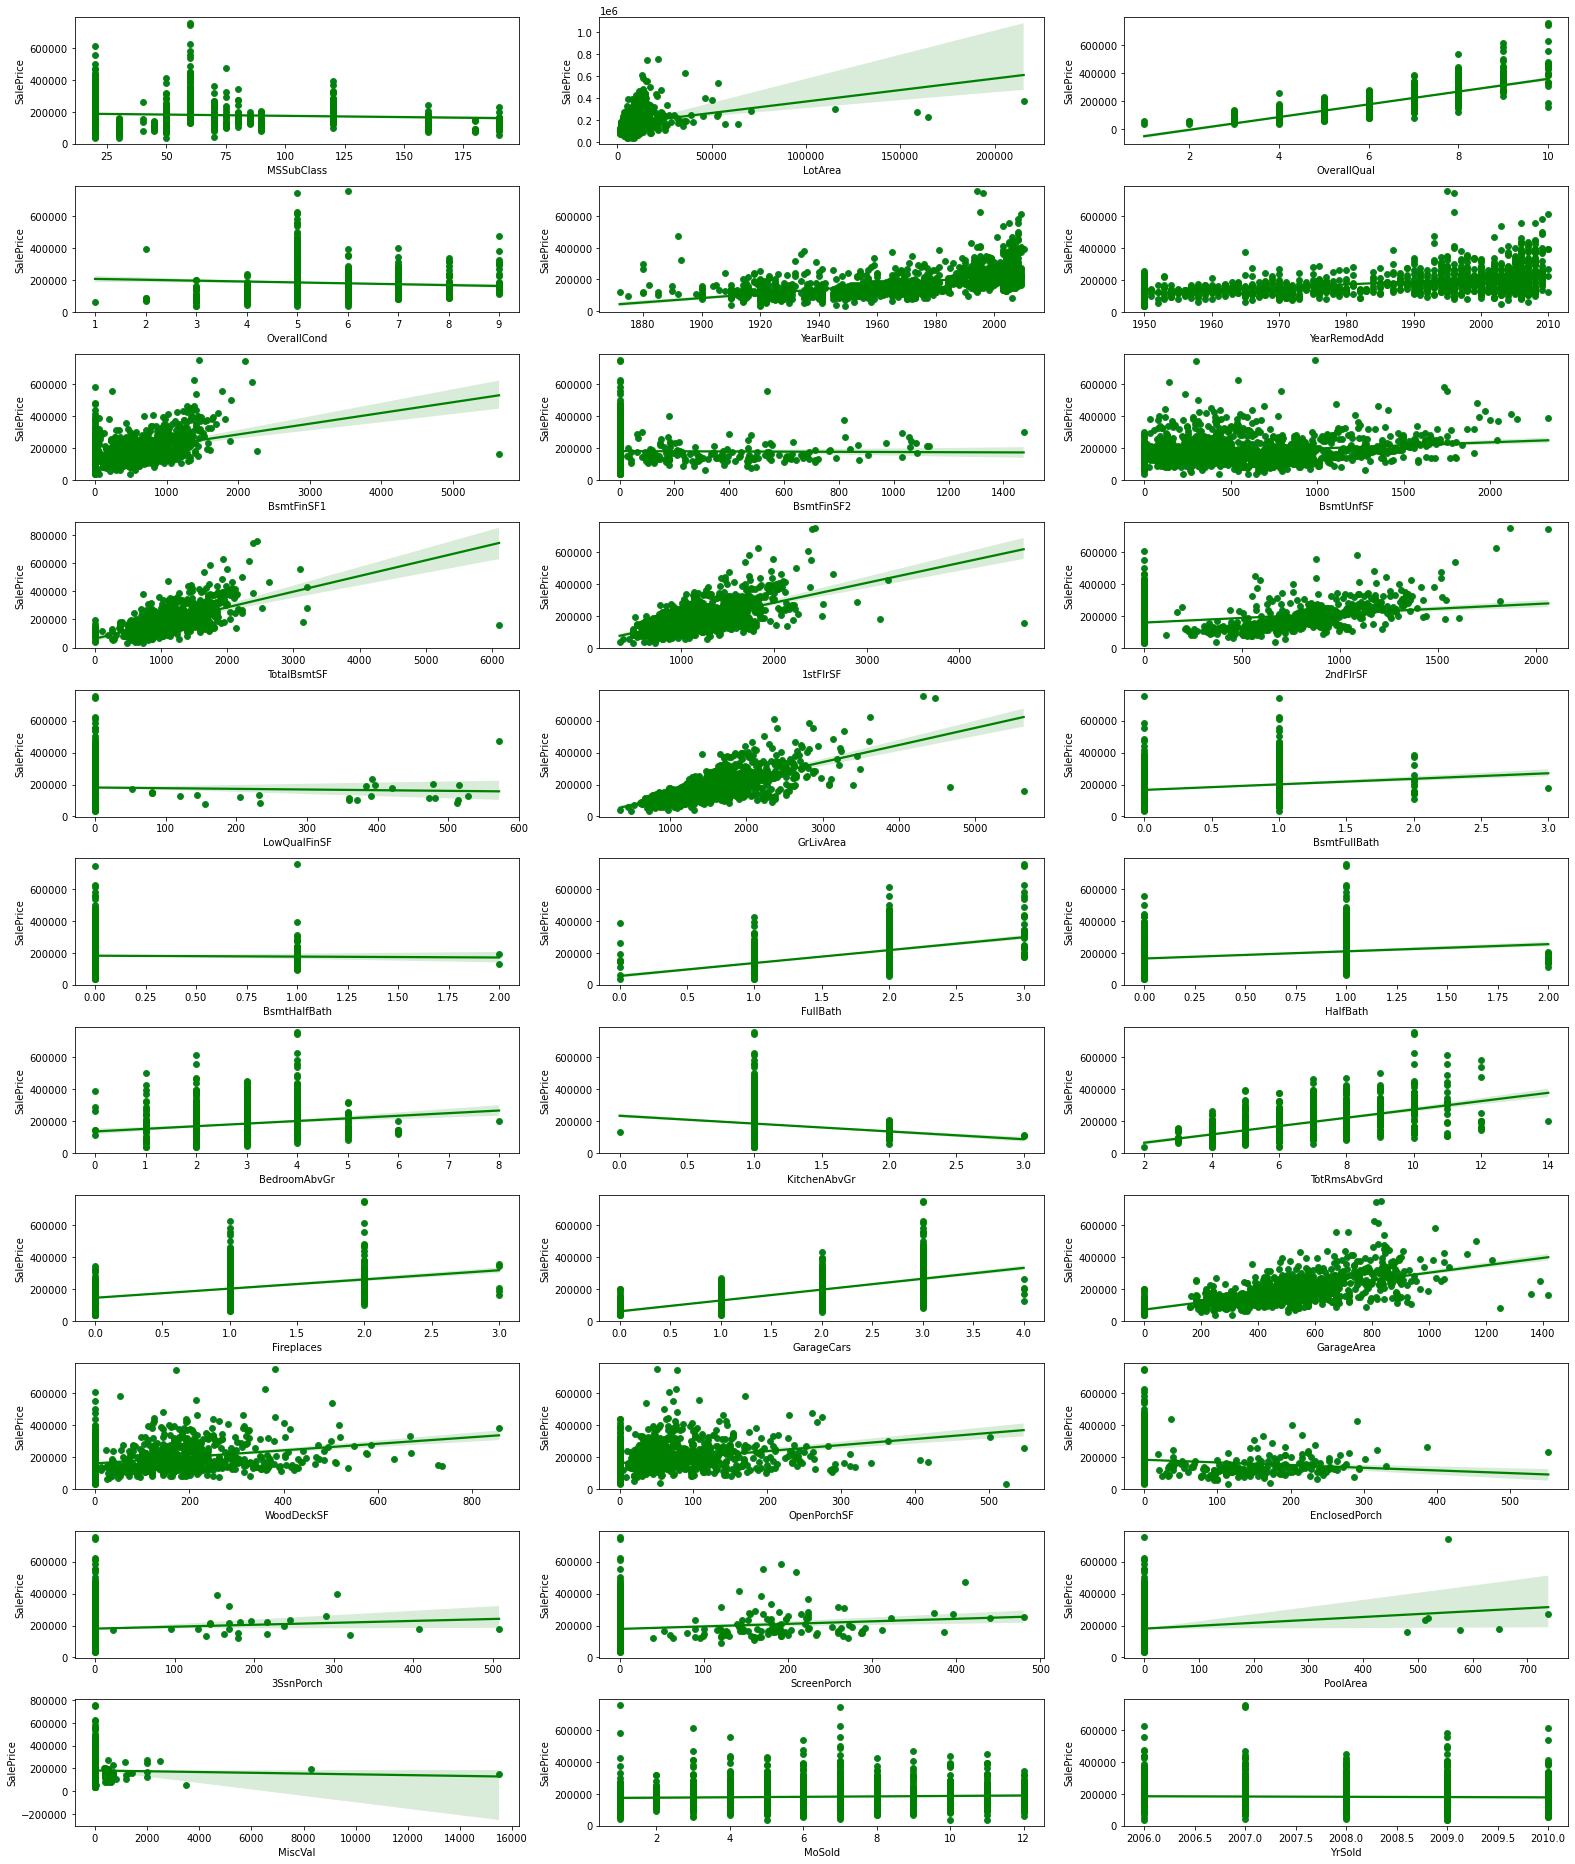

In [12]:
plt.figure(figsize=(22,26)) 

for i, iv in enumerate(IV, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(x=iv, y=DV, data=data)
    
    
    sns.regplot(x=iv, y=DV, data=data,  color='green')

plt.tight_layout()
plt.show()


In [13]:
data.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
non_linear = [ 'OverallQual', 'TotalBsmtSF', 'YearBuilt','GarageArea', 'GrLivArea', 'YearRemodAdd']
     

# Q2 : Columns which showed non linear behavior apply Polynomial Linear Regression to it ... 

Note : If there is None column which is showing Non Linear Behavior you can take anyone of the column as independent variable and apply Polynomial Linear Regression to it


In [15]:
req_col = ['OverallQual', 'TotalBsmtSF', 'YearBuilt','GarageArea', 'GrLivArea', 'YearRemodAdd', 'SalePrice']


In [16]:
df = data[req_col].copy()

In [17]:
df

,OverallQual,TotalBsmtSF,YearBuilt,GarageArea,GrLivArea,YearRemodAdd,SalePrice
0,7,856,2003,548,1710,2003,208500
1,6,1262,1976,460,1262,1976,181500
2,7,920,2001,608,1786,2002,223500
3,7,756,1915,642,1717,1970,140000
4,8,1145,2000,836,2198,2000,250000
...,...,...,...,...,...,...,...
1455,6,953,1999,460,1647,2000,175000
1456,6,1542,1978,500,2073,1988,210000
1457,7,1152,1941,252,2340,2006,266500
1458,5,1078,1950,240,1078,1996,142125


In [18]:
from sklearn.model_selection import train_test_split

# OverallQual and SalePrice¶

R2_Score: 67.43


Text(0, 0.5, 'SalePrice')

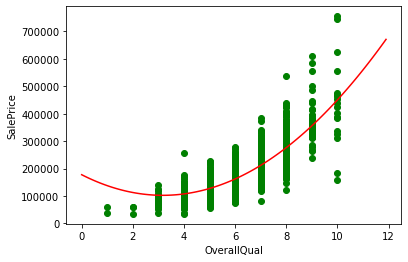

In [19]:
X = df[['OverallQual']]  
y = df[['SalePrice']]

X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state= 50)
X_train= np.asarray(X_train)
X_test= np.asarray(X_test)
y_train= np.asarray(y_train)
y_test= np.asarray(y_test)
from sklearn import linear_model
regressor = linear_model.LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_train_poly = poly.fit_transform(X_train)
regressor.fit(X_train_poly, y_train)

sample_iv = np.arange(0, 10, 0.1)


sample_dv = regressor.coef_[0][0]* np.power(sample_iv,0) + regressor.coef_[0][1]* np.power(sample_iv,1)  + regressor.coef_[0][2]* np.power(sample_iv,2) + regressor.intercept_[0]

from sklearn.metrics import r2_score
X_test_poly = poly.fit_transform(X_test)
y_hat = regressor.predict(X_test_poly)

print((f"R2_Score: {r2_score(y_test , y_hat)*100:.2f}"))

plt.scatter(df.OverallQual, df.SalePrice,  color='green')
XX = np.arange(0, 12, .1)
yy = regressor.intercept_[0]+ regressor.coef_[0][1]*XX+ regressor.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'r' )
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

# TotalBsmtSF and SalePrice

R2_Score: 39.89


Text(0, 0.5, 'SalePrice')

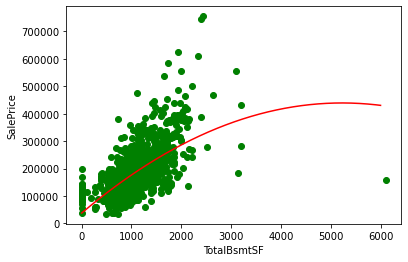

In [20]:
X = df[['TotalBsmtSF']] 
y = df[['SalePrice']]

X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state= 50)
X_train= np.asarray(X_train)
X_test= np.asarray(X_test)
y_train= np.asarray(y_train)
y_test= np.asarray(y_test)
from sklearn import linear_model
regressor = linear_model.LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_train_poly = poly.fit_transform(X_train)
regressor.fit(X_train_poly, y_train)

sample_iv = np.arange(0, 10, 0.1)


sample_dv = regressor.coef_[0][0]* np.power(sample_iv,0) + regressor.coef_[0][1]* np.power(sample_iv,1)  + regressor.coef_[0][2]* np.power(sample_iv,2) + regressor.intercept_[0]

from sklearn.metrics import r2_score
X_test_poly = poly.fit_transform(X_test)
y_hat = regressor.predict(X_test_poly)

print((f"R2_Score: {r2_score(y_test , y_hat)*100:.2f}"))

plt.scatter(df.TotalBsmtSF, df.SalePrice,  color='green')
XX = np.arange(0, 6000, .1)
yy = regressor.intercept_[0]+ regressor.coef_[0][1]*XX+ regressor.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'r' )
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")

# YearBuilt and SalePrice

R2_Score: 35.38


Text(0, 0.5, 'SalePrice')

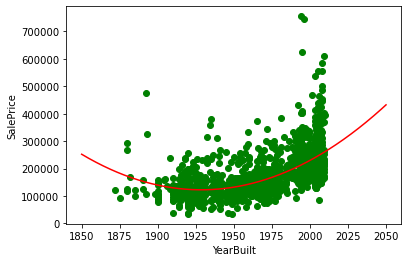

In [21]:
X = df[['YearBuilt']] 
y = df[['SalePrice']]

X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state= 50)
X_train= np.asarray(X_train)
X_test= np.asarray(X_test)
y_train= np.asarray(y_train)
y_test= np.asarray(y_test)
from sklearn import linear_model
regressor = linear_model.LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_train_poly = poly.fit_transform(X_train)
regressor.fit(X_train_poly, y_train)

sample_iv = np.arange(0, 10, 0.1)


sample_dv = regressor.coef_[0][0]* np.power(sample_iv,0) + regressor.coef_[0][1]* np.power(sample_iv,1)  + regressor.coef_[0][2]* np.power(sample_iv,2) + regressor.intercept_[0]

from sklearn.metrics import r2_score
X_test_poly = poly.fit_transform(X_test)
y_hat = regressor.predict(X_test_poly)

print((f"R2_Score: {r2_score(y_test , y_hat)*100:.2f}"))

plt.scatter(df.YearBuilt, df.SalePrice,  color='green')
XX = np.arange(1850, 2050, .1)
yy = regressor.intercept_[0]+ regressor.coef_[0][1]*XX+ regressor.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'r' )
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")

# GarageArea and SalePrice

R2_Score: 38.27


Text(0, 0.5, 'SalePrice')

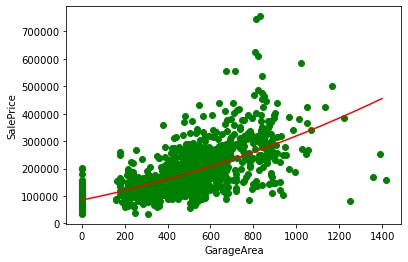

In [22]:
X = df[['GarageArea']] 
y = df[['SalePrice']]

X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state= 50)
X_train= np.asarray(X_train)
X_test= np.asarray(X_test)
y_train= np.asarray(y_train)
y_test= np.asarray(y_test)
from sklearn import linear_model
regressor = linear_model.LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_train_poly = poly.fit_transform(X_train)
regressor.fit(X_train_poly, y_train)
sample_iv = np.arange(0, 10, 0.1)


sample_dv = regressor.coef_[0][0]* np.power(sample_iv,0) + regressor.coef_[0][1]* np.power(sample_iv,1)  + regressor.coef_[0][2]* np.power(sample_iv,2) + regressor.intercept_[0]

from sklearn.metrics import r2_score
X_test_poly = poly.fit_transform(X_test)
y_hat = regressor.predict(X_test_poly)

print((f"R2_Score: {r2_score(y_test , y_hat)*100:.2f}"))

plt.scatter(df.GarageArea, df.SalePrice,  color='green')
XX = np.arange(1, 1400, .1)
yy = regressor.intercept_[0]+ regressor.coef_[0][1]*XX+ regressor.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'r' )
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")

# GrLivArea and SalePrice

R2_Score: 60.44


Text(0, 0.5, 'SalePrice')

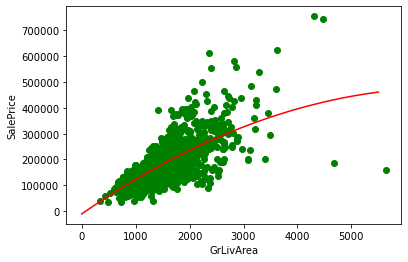

In [23]:
X = df[['GrLivArea']] 
y = df[['SalePrice']]

X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state= 50)
X_train= np.asarray(X_train)
X_test= np.asarray(X_test)
y_train= np.asarray(y_train)
y_test= np.asarray(y_test)
from sklearn import linear_model
regressor = linear_model.LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_train_poly = poly.fit_transform(X_train)
regressor.fit(X_train_poly, y_train)

sample_iv = np.arange(0, 10, 0.1)


sample_dv = regressor.coef_[0][0]* np.power(sample_iv,0) + regressor.coef_[0][1]* np.power(sample_iv,1)  + regressor.coef_[0][2]* np.power(sample_iv,2) + regressor.intercept_[0]

from sklearn.metrics import r2_score
X_test_poly = poly.fit_transform(X_test)
y_hat = regressor.predict(X_test_poly)

print((f"R2_Score: {r2_score(y_test , y_hat)*100:.2f}"))

plt.scatter(df.GrLivArea, df.SalePrice,  color='green')
XX = np.arange(0, 5500, .1)
yy = regressor.intercept_[0]+ regressor.coef_[0][1]*XX+ regressor.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'r' )
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

# YearRemodAdd and SalePrice

R2_Score: 30.69


Text(0, 0.5, 'SalePrice')

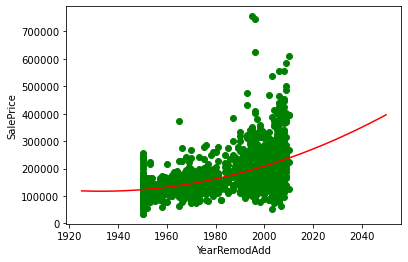

In [24]:
X = df[['YearRemodAdd']] 
y = df[['SalePrice']]

X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state= 120)
X_train= np.asarray(X_train)
X_test= np.asarray(X_test)
y_train= np.asarray(y_train)
y_test= np.asarray(y_test)
from sklearn import linear_model
regressor = linear_model.LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_train_poly = poly.fit_transform(X_train)
regressor.fit(X_train_poly, y_train)

sample_iv = np.arange(0, 10, 0.1)


sample_dv = regressor.coef_[0][0]* np.power(sample_iv,0) + regressor.coef_[0][1]* np.power(sample_iv,1)  + regressor.coef_[0][2]* np.power(sample_iv,2) + regressor.intercept_[0]

from sklearn.metrics import r2_score
X_test_poly = poly.fit_transform(X_test)
y_hat = regressor.predict(X_test_poly)

print((f"R2_Score: {r2_score(y_test , y_hat)*100:.2f}"))

plt.scatter(df.YearRemodAdd, df.SalePrice,  color='green')
XX = np.arange(1925, 2050, .1)
yy = regressor.intercept_[0]+ regressor.coef_[0][1]*XX+ regressor.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'r' )
plt.xlabel("YearRemodAdd")
plt.ylabel("SalePrice")

# Q3 : Apply multi Linear regression to the Housing Price Data Set
    
    
Note : you can take any number of Independent Variable 

Note :  You need to make 3 models atleast with different number of indepent variable 

Note : Try to get the best posible accuracy

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import seaborn as sns


In [26]:
#df = pd.read_csv("houseRegressionStudents (1) (1).csv")

In [27]:
df = pd.read_csv("C:/Users/Rushi Patil/Desktop/Data science Inside AIML/Data sets/houseRegressionStudents.csv")
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [28]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [29]:
df1 = df.drop('SalePrice',axis = 1)

In [30]:
df1

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [31]:
DV = df['SalePrice'].values 

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [33]:
data = df1.select_dtypes(include=['int64'])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [35]:
data.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [36]:
data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [37]:
new_data2 = data.drop('Id',axis = 1)   

In [38]:
new_data2

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,2010


In [39]:
Sample_IV = new_data2.values

In [40]:
from sklearn.feature_selection import mutual_info_regression

In [41]:
MIR = mutual_info_regression(Sample_IV,DV)

In [42]:
MIR

array([0.05078561, 0.10280805, 0.50627239, 0.1149772 , 0.26020041,
       0.20200498, 0.11383081, 0.        , 0.05338142, 0.26827362,
       0.24760183, 0.10272233, 0.00628096, 0.36329884, 0.01763521,
       0.01594403, 0.26236845, 0.0760211 , 0.05590241, 0.0349146 ,
       0.19961608, 0.17556416, 0.3602774 , 0.29764376, 0.03881428,
       0.05672626, 0.02295137, 0.        , 0.01567637, 0.        ,
       0.00304596, 0.        , 0.01229655])

In [43]:
MIR_Ser = pd.Series(MIR)

In [44]:
MIR_Ser

0     0.050786
1     0.102808
2     0.506272
3     0.114977
4     0.260200
5     0.202005
6     0.113831
7     0.000000
8     0.053381
9     0.268274
10    0.247602
11    0.102722
12    0.006281
13    0.363299
14    0.017635
15    0.015944
16    0.262368
17    0.076021
18    0.055902
19    0.034915
20    0.199616
21    0.175564
22    0.360277
23    0.297644
24    0.038814
25    0.056726
26    0.022951
27    0.000000
28    0.015676
29    0.000000
30    0.003046
31    0.000000
32    0.012297
dtype: float64

In [45]:
ivnames = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [46]:
MIR_Ser.index = ivnames

In [47]:
MIR_Ser

MSSubClass       0.050786
LotArea          0.102808
OverallQual      0.506272
OverallCond      0.114977
YearBuilt        0.260200
YearRemodAdd     0.202005
BsmtFinSF1       0.113831
BsmtFinSF2       0.000000
BsmtUnfSF        0.053381
TotalBsmtSF      0.268274
1stFlrSF         0.247602
2ndFlrSF         0.102722
LowQualFinSF     0.006281
GrLivArea        0.363299
BsmtFullBath     0.017635
BsmtHalfBath     0.015944
FullBath         0.262368
HalfBath         0.076021
BedroomAbvGr     0.055902
KitchenAbvGr     0.034915
TotRmsAbvGrd     0.199616
Fireplaces       0.175564
GarageCars       0.360277
GarageArea       0.297644
WoodDeckSF       0.038814
OpenPorchSF      0.056726
EnclosedPorch    0.022951
3SsnPorch        0.000000
ScreenPorch      0.015676
PoolArea         0.000000
MiscVal          0.003046
MoSold           0.000000
YrSold           0.012297
dtype: float64

In [48]:
remove_data1 = MIR_Ser.sort_values(ascending=False)

In [49]:
remove_data1

OverallQual      0.506272
GrLivArea        0.363299
GarageCars       0.360277
GarageArea       0.297644
TotalBsmtSF      0.268274
FullBath         0.262368
YearBuilt        0.260200
1stFlrSF         0.247602
YearRemodAdd     0.202005
TotRmsAbvGrd     0.199616
Fireplaces       0.175564
OverallCond      0.114977
BsmtFinSF1       0.113831
LotArea          0.102808
2ndFlrSF         0.102722
HalfBath         0.076021
OpenPorchSF      0.056726
BedroomAbvGr     0.055902
BsmtUnfSF        0.053381
MSSubClass       0.050786
WoodDeckSF       0.038814
KitchenAbvGr     0.034915
EnclosedPorch    0.022951
BsmtFullBath     0.017635
BsmtHalfBath     0.015944
ScreenPorch      0.015676
YrSold           0.012297
LowQualFinSF     0.006281
MiscVal          0.003046
BsmtFinSF2       0.000000
3SsnPorch        0.000000
PoolArea         0.000000
MoSold           0.000000
dtype: float64

In [50]:
top_5 = MIR_Ser.nlargest(5)

In [51]:
top_5

OverallQual    0.506272
GrLivArea      0.363299
GarageCars     0.360277
GarageArea     0.297644
TotalBsmtSF    0.268274
dtype: float64

In [52]:
first_col = top_5.index

In [53]:
first_col

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'], dtype='object')

In [54]:
req_col = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'YearBuilt','SalePrice']]

In [55]:
req_col

,OverallQual,GrLivArea,GarageCars,GarageArea,YearBuilt,SalePrice
0,7,1710,2,548,2003,208500
1,6,1262,2,460,1976,181500
2,7,1786,2,608,2001,223500
3,7,1717,3,642,1915,140000
4,8,2198,3,836,2000,250000
...,...,...,...,...,...,...
1455,6,1647,2,460,1999,175000
1456,6,2073,2,500,1978,210000
1457,7,2340,1,252,1941,266500
1458,5,1078,1,240,1950,142125


In [56]:
msk = np.random.rand(len(req_col)) < 0.70
train = req_col[msk]
test = req_col[~msk]

In [57]:
train.shape

(1052, 6)

In [58]:
test.shape

(408, 6)

In [59]:
# Training 1st model on OverallQual	 GrLivArea	  GarageCars

In [60]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [61]:
x = np.asanyarray(train[['OverallQual','GrLivArea','GarageCars']]) 
y = np.asanyarray(train[['SalePrice']])
regr.fit(x, y)
print ('Intercept: ',regr.intercept_)
print ('Coefficient : ',regr.coef_)

from sklearn.metrics import r2_score
X_test = test[['OverallQual','GrLivArea','GarageCars']]
y_test = test[['SalePrice']]

y_hat = regr.predict(X_test)
y_test = np.asanyarray(y_test)

model_1st = float(f"{r2_score(y_hat , y_test)*100:.2f}")
print(model_1st)

Intercept:  [-98260.30394513]
Coefficient :  [[27139.5201615     50.58189838 20970.20689552]]
66.62


C:\Users\Rushi Patil\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [62]:
# Training 2nd model on OverallQual	 GrLivArea	  GarageCars GarageArea

In [63]:
msk = np.random.rand(len(req_col)) < 0.70
train = req_col[msk]
test = req_col[~msk]

In [64]:
x = np.asanyarray(train[['OverallQual','GrLivArea','GarageCars','GarageArea']]) 
y = np.asanyarray(train[['SalePrice']])
regr.fit(x, y)
print ('Intercept: ',regr.intercept_)
print ('Coefficient : ',regr.coef_)

from sklearn.metrics import r2_score
X_test = test[['OverallQual','GrLivArea','GarageCars','GarageArea']]
y_test = test[['SalePrice']]

y_hat = regr.predict(X_test)
y_test = np.asanyarray(y_test)

model_2nd = float(f"{r2_score(y_hat , y_test)*100:.2f}")
print(model_2nd)


Intercept:  [-96921.76804595]
Coefficient :  [[26469.4821189     49.62590349 12855.38225716    40.42899477]]
73.74


C:\Users\Rushi Patil\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [65]:
# Training 3rd model on OverallQual	 GrLivArea	  GarageCars GarageArea YearBuilt

In [66]:
msk = np.random.rand(len(req_col)) < 0.90
train = req_col[msk]
test = req_col[~msk]

In [67]:
x = np.asanyarray(train[['OverallQual','GrLivArea','GarageCars','GarageArea', 'YearBuilt']])  
y = np.asanyarray(train[['SalePrice']])
regr.fit(x, y)
print ('Intercept: ',regr.intercept_)
print ('Coefficient : ',regr.coef_)

from sklearn.metrics import r2_score
X_test = test[['OverallQual','GrLivArea','GarageCars','GarageArea','YearBuilt']]
y_test = test[['SalePrice']]

y_hat = regr.predict(X_test)
y_test = np.asanyarray(y_test)

model_3rd = float(f"{r2_score(y_hat , y_test)*100:.2f}")
print(model_3rd)


Intercept:  [-796873.49000707]
Coefficient :  [[22316.61905507    56.19927925  7630.51701339    37.01617316
    367.94948525]]
65.3


C:\Users\Rushi Patil\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Training model on 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','YearBuilt', 'FullBath', '1stFlrSF', 'YearRemodAdd', 'TotRmsAbvGrd' 10 IV and 1 DV For best accuracy


In [68]:
req_col1 = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       'YearBuilt', 'FullBath', '1stFlrSF', 'YearRemodAdd', 'TotRmsAbvGrd', "SalePrice"]]

In [69]:
req_col1

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,YearBuilt,FullBath,1stFlrSF,YearRemodAdd,TotRmsAbvGrd,SalePrice
0,7,1710,2,548,856,2003,2,856,2003,8,208500
1,6,1262,2,460,1262,1976,2,1262,1976,6,181500
2,7,1786,2,608,920,2001,2,920,2002,6,223500
3,7,1717,3,642,756,1915,1,961,1970,7,140000
4,8,2198,3,836,1145,2000,2,1145,2000,9,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,1999,2,953,2000,7,175000
1456,6,2073,2,500,1542,1978,2,2073,1988,7,210000
1457,7,2340,1,252,1152,1941,2,1188,2006,9,266500
1458,5,1078,1,240,1078,1950,1,1078,1996,5,142125


In [70]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()

IV_1= req_col1[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       'YearBuilt', 'FullBath', '1stFlrSF', 'YearRemodAdd', 'TotRmsAbvGrd']]  
DV_1 = req_col1[["SalePrice"]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(IV_1, DV_1, test_size= 0.10, random_state= 135)


X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train= np.asarray(y_train)
y_test= np.asarray(y_test)

regressor.fit(X_train,y_train)

y_hat = regressor.predict(X_test)

from sklearn.metrics import r2_score 

model_4th = float(f"{r2_score(y_hat, y_test)*100:.2f}")

model_4th

85.47

In [71]:
max_r2_score = max(model_1st, model_2nd, model_3rd, model_4th)



if max_r2_score == model_1st:
    print(f"Model 1 has the largest accuracy= {model_1st} as R2-Score")
elif max_r2_score == model_2nd:
    print(f"Model 2 has the largest accuracy= {model_2nd} as R2-Score")
elif max_r2_score == model_3rd:
    print(f"Model3 has the largest accuracy= {model_3rd} as R2-Score")       
else:
    print(f"Model 4 has the largest accuracy= {model_4th} as R2-Score ")



Model 4 has the largest accuracy= 85.47 as R2-Score 


# Q4 : We are providing you churn dataset and we expect you to apply logistic regression on it and try to change the hyperparameters so that you can get the best possible acuracy


In [345]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt

In [346]:
df = pd.read_csv("C:/Users/Rushi Patil/Downloads/ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [348]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [349]:
ivnames = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
         'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
         'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
         'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
         'lninc', 'custcat']

In [350]:
IV = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
         'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
         'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
         'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
         'lninc', 'custcat']].values

In [351]:
DV = df['churn'].values 

In [352]:
DV

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [353]:
IV

array([[11.   , 33.   ,  7.   , ...,  3.033,  4.913,  4.   ],
       [33.   , 33.   , 12.   , ...,  3.24 ,  3.497,  1.   ],
       [23.   , 30.   ,  9.   , ...,  3.24 ,  3.401,  3.   ],
       ...,
       [ 6.   , 32.   , 10.   , ...,  3.168,  3.85 ,  3.   ],
       [24.   , 30.   ,  0.   , ...,  3.866,  3.219,  4.   ],
       [61.   , 50.   , 16.   , ...,  3.24 ,  5.247,  2.   ]])

In [354]:
from sklearn.feature_selection import mutual_info_classif

In [355]:
MIC = mutual_info_classif(IV,DV)

In [356]:
MIC

array([0.12863584, 0.04886457, 0.09742006, 0.03271275, 0.03038529,
       0.08617442, 0.        , 0.04136502, 0.0212465 , 0.02867568,
       0.02508723, 0.00301221, 0.01864649, 0.02239359, 0.05729314,
       0.        , 0.03878041, 0.        , 0.        , 0.02425407,
       0.01894765, 0.        , 0.00409708, 0.02496354, 0.        ,
       0.00967741, 0.03151611])

In [357]:
MIC_Ser = pd.Series(MIC)
MIC_Ser

0     0.128636
1     0.048865
2     0.097420
3     0.032713
4     0.030385
5     0.086174
6     0.000000
7     0.041365
8     0.021247
9     0.028676
10    0.025087
11    0.003012
12    0.018646
13    0.022394
14    0.057293
15    0.000000
16    0.038780
17    0.000000
18    0.000000
19    0.024254
20    0.018948
21    0.000000
22    0.004097
23    0.024964
24    0.000000
25    0.009677
26    0.031516
dtype: float64

In [358]:
MIC_Ser.index = ivnames

In [359]:
MIC_Ser

tenure      0.128636
age         0.048865
address     0.097420
income      0.032713
ed          0.030385
employ      0.086174
equip       0.000000
callcard    0.041365
wireless    0.021247
longmon     0.028676
tollmon     0.025087
equipmon    0.003012
cardmon     0.018646
wiremon     0.022394
longten     0.057293
tollten     0.000000
cardten     0.038780
voice       0.000000
pager       0.000000
internet    0.024254
callwait    0.018948
confer      0.000000
ebill       0.004097
loglong     0.024964
logtoll     0.000000
lninc       0.009677
custcat     0.031516
dtype: float64

In [360]:
remove_data1 = MIC_Ser.sort_values(ascending=False)

In [361]:
remove_data1

tenure      0.128636
address     0.097420
employ      0.086174
longten     0.057293
age         0.048865
callcard    0.041365
cardten     0.038780
income      0.032713
custcat     0.031516
ed          0.030385
longmon     0.028676
tollmon     0.025087
loglong     0.024964
internet    0.024254
wiremon     0.022394
wireless    0.021247
callwait    0.018948
cardmon     0.018646
lninc       0.009677
ebill       0.004097
equipmon    0.003012
tollten     0.000000
equip       0.000000
voice       0.000000
confer      0.000000
logtoll     0.000000
pager       0.000000
dtype: float64

In [362]:
top_10 = MIC_Ser.nlargest(10)

In [363]:
top_10

tenure      0.128636
address     0.097420
employ      0.086174
longten     0.057293
age         0.048865
callcard    0.041365
cardten     0.038780
income      0.032713
custcat     0.031516
ed          0.030385
dtype: float64

In [364]:
required_col = top_10.index


In [365]:
required_col_list = required_col.tolist()

In [366]:
required_col_list

['tenure',
 'address',
 'employ',
 'longten',
 'age',
 'callcard',
 'cardten',
 'income',
 'custcat',
 'ed']

In [367]:
required_col_list.append('churn')
cdf = df[required_col_list]

In [368]:
cdf

,tenure,address,employ,longten,age,callcard,cardten,income,custcat,ed,churn
0,11.0,7.0,5.0,42.00,33.0,1.0,125.0,136.0,4.0,5.0,1.0
1,33.0,12.0,0.0,288.80,33.0,0.0,0.0,33.0,1.0,2.0,1.0
2,23.0,9.0,2.0,157.05,30.0,0.0,0.0,30.0,3.0,1.0,0.0
3,38.0,5.0,10.0,239.55,35.0,1.0,880.0,76.0,4.0,2.0,0.0
4,7.0,14.0,15.0,47.45,35.0,1.0,145.0,80.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,24.0,23.0,973.10,44.0,1.0,720.0,83.0,3.0,1.0,0.0
196,34.0,3.0,7.0,203.25,23.0,1.0,435.0,24.0,3.0,1.0,0.0
197,6.0,10.0,10.0,29.90,32.0,1.0,80.0,47.0,3.0,1.0,0.0
198,24.0,0.0,5.0,186.60,30.0,1.0,780.0,25.0,4.0,4.0,1.0


In [369]:
cdf['churn'] = cdf['churn'].astype('int')
cdf.head()

C:\Users\Rushi Patil\AppData\Local\Temp\ipykernel_11132\2397164521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['churn'] = cdf['churn'].astype('int')


,tenure,address,employ,longten,age,callcard,cardten,income,custcat,ed,churn
0,11.0,7.0,5.0,42.00,33.0,1.0,125.0,136.0,4.0,5.0,1
1,33.0,12.0,0.0,288.80,33.0,0.0,0.0,33.0,1.0,2.0,1
2,23.0,9.0,2.0,157.05,30.0,0.0,0.0,30.0,3.0,1.0,0
3,38.0,5.0,10.0,239.55,35.0,1.0,880.0,76.0,4.0,2.0,0
4,7.0,14.0,15.0,47.45,35.0,1.0,145.0,80.0,3.0,2.0,0


In [370]:
cdf.shape

(200, 11)

In [371]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   address   200 non-null    float64
 2   employ    200 non-null    float64
 3   longten   200 non-null    float64
 4   age       200 non-null    float64
 5   callcard  200 non-null    float64
 6   cardten   200 non-null    float64
 7   income    200 non-null    float64
 8   custcat   200 non-null    float64
 9   ed        200 non-null    float64
 10  churn     200 non-null    int32  
dtypes: float64(10), int32(1)
memory usage: 16.5 KB


In [372]:
required_col_list

['tenure',
 'address',
 'employ',
 'longten',
 'age',
 'callcard',
 'cardten',
 'income',
 'custcat',
 'ed',
 'churn']

In [373]:
required_col_list.remove('churn')


In [374]:
required_col_list

['tenure',
 'address',
 'employ',
 'longten',
 'age',
 'callcard',
 'cardten',
 'income',
 'custcat',
 'ed']

In [375]:
data_x = np.asarray(cdf[required_col_list])
data_y = np.asarray(cdf[['churn']])


In [376]:
data_x = preprocessing.StandardScaler().fit(data_x).transform(data_x)

In [377]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(data_x, data_y, test_size = 0.1, random_state = 50)

In [378]:
print("Train stats:", X_train.shape, y_train.shape)
print("Test Stats:", X_test.shape, y_test.shape)

Train stats: (180, 10) (180, 1)
Test Stats: (20, 10) (20, 1)


In [379]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.2, solver = "newton-cg", verbose = 1).fit(X_train, y_train)

C:\Users\Rushi Patil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [380]:
y_pred = LR.predict(X_test)


In [381]:
from sklearn.metrics import accuracy_score as acc


In [382]:
newton_sol =((f"{acc(y_test, y_pred)*100:.2f}"))

newton_sol

'85.00'

In [383]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.2, solver = "lbfgs", verbose = 1).fit(X_train, y_train)
y_pred = LR.predict(X_test)

lbfgs_sol = ((f"{acc(y_test, y_pred)*100:.2f}"))

lbfgs_sol

C:\Users\Rushi Patil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


'85.00'

In [384]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.2, solver = "liblinear", verbose = 1).fit(X_train, y_train)
y_pred = LR.predict(X_test)

liblinear_sol = ((f"{acc(y_test, y_pred)*100:.2f}"))
liblinear_sol

[LibLinear]

C:\Users\Rushi Patil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'90.00'

In [385]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.2, solver = "sag", verbose = 1).fit(X_train, y_train)
y_pred = LR.predict(X_test)

sag_sol = ((f"{acc(y_test, y_pred)*100:.2f}"))

sag_sol

convergence after 31 epochs took 0 seconds


C:\Users\Rushi Patil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


'85.00'

In [386]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.2, solver = "saga", verbose = 1).fit(X_train, y_train)
y_pred = LR.predict(X_test)

saga_sol = ((f"{acc(y_test, y_pred)*100:.2f}"))

saga_sol

convergence after 59 epochs took 0 seconds


C:\Users\Rushi Patil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


'85.00'

In [387]:
max_acc_score = max(newton_sol, liblinear_sol,sag_sol,saga_sol, lbfgs_sol)
max_acc_score

'90.00'

In [388]:
accuracy_scores = {
    'newton-cg': newton_sol,
    'liblinear': liblinear_sol,
    'sag': sag_sol,
    'saga': saga_sol,
    'lbfgs': lbfgs_sol
}

max_acc_score = max(accuracy_scores.values())
max_acc_score

'90.00'

In [389]:
max_solver_names = [solver_name for solver_name, accuracy_score in accuracy_scores.items() if accuracy_score == max_acc_score]

In [390]:
max_solver_names

['liblinear']

In [391]:
print("Solver(s) with Maximum Accuracy:")
for solver_name in max_solver_names:
    print(solver_name)
print("Maximum Accuracy Score:", max_acc_score)

Solver(s) with Maximum Accuracy:
liblinear
Maximum Accuracy Score: 90.00


# Q5 : We are providing you the cell dataset and we expect you to use all the independent variables for creating the SVM machine learning model and change the hyperparameters so that you can get the best accuracy


In [119]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [120]:
data = pd.read_csv("C:/Users/Rushi Patil/Downloads/cell_samples.csv")
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [121]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [122]:
data = data[pd.to_numeric(data["BareNuc"], errors='coerce').notnull()] 
data["BareNuc"] = data["BareNuc"].astype(int) 
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int32
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 61.4 KB


In [124]:
feature_cdf = data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BlandChrom', 'NormNucl', 'Mit','BareNuc']]
feature_cdf 

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,BareNuc
0,5,1,1,1,2,3,1,1,1
1,5,4,4,5,7,3,2,1,10
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,4
4,4,1,1,3,2,3,1,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,1,1,1,2
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,8,10,2,3
697,4,8,6,4,3,10,6,1,4


In [125]:
feature_cdf.dtypes

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BlandChrom     int64
NormNucl       int64
Mit            int64
BareNuc        int32
dtype: object

In [126]:
X = np.asarray(feature_cdf) 
X[0:5] 

array([[ 5,  1,  1,  1,  2,  3,  1,  1,  1],
       [ 5,  4,  4,  5,  7,  3,  2,  1, 10],
       [ 3,  1,  1,  1,  2,  3,  1,  1,  2],
       [ 6,  8,  8,  1,  3,  3,  7,  1,  4],
       [ 4,  1,  1,  3,  2,  3,  1,  1,  1]], dtype=int64)

In [127]:
data['Class'] = data['Class'].astype('int')
y = np.asarray(data['Class']) 
y [0:5]

array([2, 2, 2, 2, 2])

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


# Modeling Polynomial hyperparameters¶

In [129]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train) 

SVC(kernel='poly')

In [130]:
yhat = clf.predict(X_test) 
yhat [0:5]

array([4, 4, 2, 2, 4])

In [131]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9705545767262355

In [132]:
from sklearn.metrics import accuracy_score
print("accuracy =", accuracy_score(y_test, yhat))

accuracy = 0.9708029197080292


In [133]:
acc_poly = float(f"{accuracy_score(y_test, yhat)*100:.2f}")
acc_poly

97.08

# Modeling Radial basis function (RBF) hyperparameters

In [134]:
clf2 = svm.SVC(kernel='rbf')
clf2.fit(X_train, y_train) 
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
acc_RBF = float(f"{accuracy_score(y_test, yhat2)*100:.2f}")
acc_RBF

98.54

# Modeling sigmoid hyperparameters

In [135]:
clf3 = svm.SVC(kernel='sigmoid')
clf3.fit(X_train, y_train) 
yhat3 = clf3.predict(X_test)

acc_sigmoid = float(f"{accuracy_score(y_test, yhat3)*100:.2f}")
acc_sigmoid

42.34

# Modeling Linear hyperparameters

In [136]:
clf4 = svm.SVC(kernel='linear')
clf4.fit(X_train, y_train) 
yhat4 = clf4.predict(X_test)
acc_linear = float(f"{accuracy_score(y_test, yhat4)*100:.2f}")
acc_linear

98.54

In [137]:
print([acc_linear,acc_sigmoid,acc_RBF,acc_poly])


[98.54, 42.34, 98.54, 97.08]


In [138]:
accuracy_dict = {
    'acc_linear': acc_linear,
    'acc_sigmoid': acc_sigmoid,
    'acc_RBF': acc_RBF,
    'acc_poly': acc_poly
}

accuracy_dict

{'acc_linear': 98.54,
 'acc_sigmoid': 42.34,
 'acc_RBF': 98.54,
 'acc_poly': 97.08}

In [139]:
highest_accuracy = max(accuracy_dict.values())
highest_accuracy

98.54

In [140]:
highest_accuracy_ker = [kernel_name for kernel_name, accuracy in accuracy_dict.items() if accuracy == highest_accuracy]
highest_accuracy_ker

['acc_linear', 'acc_RBF']

In [141]:
print(f"hyperparameters names with best accuracy - {highest_accuracy_ker} with accuracy {highest_accuracy}")

hyperparameters names with best accuracy - ['acc_linear', 'acc_RBF'] with accuracy 98.54


# Q6 :  Take the same cell Dataset and instead of SVM apply logistic regression in it..

In [142]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [143]:
data = pd.read_csv("C:/Users/Rushi Patil/Downloads/cell_samples.csv")
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [144]:
data.dtypes


ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [145]:
data.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [146]:
data = data[pd.to_numeric(data["BareNuc"], errors='coerce').notnull()] 
data["BareNuc"] = data["BareNuc"].astype(int) 
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [147]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [148]:
data.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [149]:
data =data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class']]
data.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [150]:
data.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [151]:
X = np.asarray(data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]) 


In [152]:
y = np.asarray(data['Class']) 


In [153]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=50) 
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [154]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='saga')
LR.fit(X_train,y_train)  
LR

C:\Users\Rushi Patil\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [155]:
yhat = LR.predict(X_test)
yhat[:5]

array([4, 4, 2, 2, 4], dtype=int64)

In [156]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.00234782, 0.99765218],
       [0.20653658, 0.79346342],
       [0.97447418, 0.02552582],
       [0.95224479, 0.04775521],
       [0.06084824, 0.93915176]])

In [157]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9853432121448137

In [158]:
from sklearn.metrics import accuracy_score as acc
print(acc(y_test, yhat))

0.9854014598540146


In [159]:
(f"{f1_score(y_test, yhat, average='weighted')*100:.2f}")

'98.53'

In [160]:
print(f"{acc(y_test, yhat)*100:.2f}")


98.54


# Q7 : we are providing you a dataset apart from churn and cell dataset which is titanic dataset remove unnecessary column which are not usefull  with aspect of machine learning and apply label encoding where ever its necessary and store processed data into your memory

	NOTE : Survived is the dependent Column


In [161]:
import pandas as pd
import numpy as np

In [162]:
df = pd.read_csv("C:/Users/Rushi Patil/Desktop/Data science Inside AIML/Data sets/train_ titanic dataset.csv")
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
707,885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [163]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [164]:
df = df.drop('Unnamed: 0', axis=1)

In [165]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
707,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
708,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 61.3+ KB


In [167]:
df.select_dtypes(include='object')

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
707,"Rice, Mrs. William (Margaret Norton)",female,382652,Q
708,"Montvila, Rev. Juozas",male,211536,S
709,"Graham, Miss. Margaret Edith",female,112053,S
710,"Behr, Mr. Karl Howell",male,111369,C


In [168]:
df['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [169]:
df['Ticket'].value_counts()

347082          7
CA 2144         6
3101295         6
347088          6
S.O.C. 14879    5
               ..
250651          1
2693            1
349233          1
349236          1
370376          1
Name: Ticket, Length: 541, dtype: int64

In [170]:
df['Name'].value_counts()


Braund, Mr. Owen Harris                            1
Kimball, Mr. Edwin Nelson Jr                       1
Chapman, Mr. John Henry                            1
Van Impe, Mr. Jean Baptiste                        1
Johnson, Mr. Alfred                                1
                                                  ..
Allison, Miss. Helen Loraine                       1
Baxter, Mrs. James (Helene DeLaudeniere Chaput)    1
Johnson, Mr. William Cahoone Jr                    1
Allison, Master. Hudson Trevor                     1
Dooley, Mr. Patrick                                1
Name: Name, Length: 712, dtype: int64

In [171]:
len(df['Name'].unique())

712

In [172]:
len(df['Ticket'].unique())


541

In [173]:
df = df.drop(['Ticket', 'Name'], axis=1)

In [174]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
707,886,0,3,female,39.0,0,5,29.1250,Q
708,887,0,2,male,27.0,0,0,13.0000,S
709,888,1,1,female,19.0,0,0,30.0000,S
710,890,1,1,male,26.0,0,0,30.0000,C


In [175]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [176]:
list= ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']

In [177]:
list.index('Sex')

3

In [178]:
list.index('Embarked')

8

In [179]:
list[3]

'Sex'

In [180]:
from sklearn import preprocessing
le_gender = preprocessing.LabelEncoder()

In [181]:
df['Sex'].value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [182]:
df['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [183]:
X = df.values
x

array([[   7, 1710,    2,  548, 2003],
       [   7, 1786,    2,  608, 2001],
       [   7, 1717,    3,  642, 1915],
       ...,
       [   7, 2340,    1,  252, 1941],
       [   5, 1078,    1,  240, 1950],
       [   5, 1256,    1,  276, 1965]], dtype=int64)

In [184]:
le_gender.fit(['male','female'])
X[:,3] = le_gender.transform(X[:,3])  

In [185]:
le_emb = preprocessing.LabelEncoder()
le_emb.fit([ 'S', 'C', 'Q'])
X[:,-1] = le_emb.transform(X[:,-1]) 

In [186]:
X

array([[1, 0, 3, ..., 0, 7.25, 2],
       [2, 1, 1, ..., 0, 71.2833, 0],
       [3, 1, 3, ..., 0, 7.925, 2],
       ...,
       [888, 1, 1, ..., 0, 30.0, 2],
       [890, 1, 1, ..., 0, 30.0, 0],
       [891, 0, 3, ..., 0, 7.75, 1]], dtype=object)

In [187]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
707,886,0,3,female,39.0,0,5,29.1250,Q
708,887,0,2,male,27.0,0,0,13.0000,S
709,888,1,1,female,19.0,0,0,30.0000,S
710,890,1,1,male,26.0,0,0,30.0000,C


In [188]:
df['Sex'] = pd.Series(X[:,3])

df['Embarked'] = pd.Series(X[:,-1])

In [189]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
707,886,0,3,0,39.0,0,5,29.1250,1
708,887,0,2,1,27.0,0,0,13.0000,2
709,888,1,1,0,19.0,0,0,30.0000,2
710,890,1,1,1,26.0,0,0,30.0000,0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 50.2+ KB


In [191]:
df = df[pd.to_numeric(df["Sex"], errors='coerce').notnull()] # Convert Object to Numeric
df["Sex"] = df["Sex"].astype(int) # Convert Numeric to int
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [192]:
df = df[pd.to_numeric(df["Embarked"], errors='coerce').notnull()] # Convert Object to Numeric
df["Embarked"] = df["Embarked"].astype(int) # Convert Numeric to int
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

In [193]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
707,886,0,3,0,39.0,0,5,29.1250,1
708,887,0,2,1,27.0,0,0,13.0000,2
709,888,1,1,0,19.0,0,0,30.0000,2
710,890,1,1,1,26.0,0,0,30.0000,0


# Lets apply correlation

In [194]:
cor_df = df.drop(['Survived'], axis=1)
cor_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
707,886,3,0,39.0,0,5,29.1250,1
708,887,2,1,27.0,0,0,13.0000,2
709,888,1,0,19.0,0,0,30.0000,2
710,890,1,1,26.0,0,0,30.0000,0


In [195]:
corr_matrix = cor_df.corr()

In [196]:
corr_matrix

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035609,0.024674,0.033681,-0.082704,-0.011672,0.009655,-0.001836
Pclass,-0.035609,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,0.024674,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639
Age,0.033681,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,-0.082704,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,-0.011672,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.009655,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,-0.001836,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


In [197]:
threshold = 0.5
column_names = set()
for row in range(len(corr_matrix)):
    for col in range(row):
        if abs(corr_matrix.iloc[row][col]) > threshold:
            print(corr_matrix.iloc[row][col])
            print(corr_matrix.columns[row])
            column_names.add(corr_matrix.columns[row])  

-0.5528932206457601
Fare


In [198]:
df = df.drop(['Fare'], axis=1)

In [199]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...,...
707,886,0,3,0,39.0,0,5,1
708,887,0,2,1,27.0,0,0,2
709,888,1,1,0,19.0,0,0,2
710,890,1,1,1,26.0,0,0,0


# Lets apply Variance

In [200]:
from sklearn.feature_selection import VarianceThreshold

In [201]:
varT = VarianceThreshold()

In [202]:
varTdataset = VarianceThreshold(threshold=0.2) 
op = varTdataset.fit(df)
op.get_support()
len(df.columns[op.get_support() == False])

0

In [203]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...,...
707,886,0,3,0,39.0,0,5,1
708,887,0,2,1,27.0,0,0,2
709,888,1,1,0,19.0,0,0,2
710,890,1,1,1,26.0,0,0,0


# Lets apply MIC

In [204]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

In [205]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...,...
707,886,0,3,0,39.0,0,5,1
708,887,0,2,1,27.0,0,0,2
709,888,1,1,0,19.0,0,0,2
710,890,1,1,1,26.0,0,0,0


In [206]:
ivnames = ['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Embarked']

In [207]:
IV = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].values

In [208]:
DV = df['Survived'].values

In [209]:
df['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [210]:
from sklearn.feature_selection import mutual_info_classif

In [211]:
MIC = mutual_info_classif(IV,DV)
MIC

array([0.01764232, 0.05553584, 0.14163071, 0.00030685, 0.03709904,
       0.0240375 , 0.01070525])

In [212]:
MIC_ser = pd.Series(MIC)

In [213]:
MIC_ser

0    0.017642
1    0.055536
2    0.141631
3    0.000307
4    0.037099
5    0.024038
6    0.010705
dtype: float64

In [214]:
ivnames

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

In [215]:
MIC_ser.index = ivnames

In [216]:
MIC_ser

PassengerId    0.017642
Pclass         0.055536
Sex            0.141631
Age            0.000307
SibSp          0.037099
Parch          0.024038
Embarked       0.010705
dtype: float64

In [217]:
MIC_ser.sort_values(ascending=False)

Sex            0.141631
Pclass         0.055536
SibSp          0.037099
Parch          0.024038
PassengerId    0.017642
Embarked       0.010705
Age            0.000307
dtype: float64

In [218]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...,...
707,886,0,3,0,39.0,0,5,1
708,887,0,2,1,27.0,0,0,2
709,888,1,1,0,19.0,0,0,2
710,890,1,1,1,26.0,0,0,0


In [219]:
df = df.drop('PassengerId', axis=1)

In [220]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,1
708,0,2,1,27.0,0,0,2
709,1,1,0,19.0,0,0,2
710,1,1,1,26.0,0,0,0


In [221]:
titanic_new = df

In [222]:
titanic_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,1
708,0,2,1,27.0,0,0,2
709,1,1,0,19.0,0,0,2
710,1,1,1,26.0,0,0,0


In [223]:
df.to_csv("C:/Users/Rushi Patil/Desktop/Data science Inside AIML/titanic_new.csv")

# Q8 : Use that processed titanic dataset and apply svm in it 

In [224]:
import numpy as np
import pandas as pd

In [225]:
df = pd.read_csv("C:/Users/Rushi Patil/Desktop/Data science Inside AIML/titanic_new.csv")
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,0,3,1,22.0,1,0,2
1,1,1,1,0,38.0,1,0,0
2,2,1,3,0,26.0,0,0,2
3,3,1,1,0,35.0,1,0,2
4,4,0,3,1,35.0,0,0,2


In [226]:
df = df.drop(['Unnamed: 0'], axis=1)

In [227]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,1
708,0,2,1,27.0,0,0,2
709,1,1,0,19.0,0,0,2
710,1,1,1,26.0,0,0,0


In [228]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [229]:
iv = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
dv = df[['Survived']]

X = np.asarray(iv)
y = np.asarray(dv)

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=35)

In [232]:
print("Train Stats", X_train.shape, y_train.shape)
print("Test Stats", X_test.shape, y_test.shape)

Train Stats (569, 6) (569, 1)
Test Stats (143, 6) (143, 1)


In [233]:
from sklearn.svm import SVC


classifier = SVC(kernel='linear') 
classifier.fit(X_train, y_train)

C:\Users\Rushi Patil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [234]:
y_pred = classifier.predict(X_test)

In [235]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [236]:
print(f"Accuracy = {acc(y_test, y_pred)*100:.2f}")
print(f"f1_score = {f1_score(y_test, y_pred, average='weighted')*100:.2f}")

Accuracy = 85.31
f1_score = 85.34
